<a href="https://colab.research.google.com/github/harshithere/addons/blob/hammingloss/docs/tutorials/metrics_hammingloss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Title

<table class="tfa-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/addons/tutorials/metrics_hammingloss"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/addons/blob/master/docs/tutorials/metrics_hammingloss.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/addons/blob/master/docs/tutorials/metrics_hammingloss.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
      <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/docs/tutorials/_template.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Overview

This notebook explains how to use the Hamming loss as a metric for training multilabel models

### Hamming Loss
In multilabel classification, more than one labels can be the correct output for each input sample. Thus, the loss and accuracy metrics are chosen such that they can effectively represent the case when the output is partially correct. Since binary or categorical accuracies fall sort in this regard, we use the hamming loss

Hamming loss is defined as the number of misclassified labels to the total number of labels. The ideal value of this is naturally 0

## Resources

https://www.tensorflow.org/addons/api_docs/python/tfa/metrics/HammingLoss <br>
https://en.wikipedia.org/wiki/Multi-label_classification

## Setup

In [5]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import random
from matplotlib import pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow_addons.metrics import HammingLoss

## Creat dummy dataset

In [6]:
# Create random input with 1000 samples and 10 features
X = np.random.rand(1000, 10)

# Create random output with 6 labels (2 correct labels)
Y = []
for i in range(0, 1000):
    res = [0]*6
    n = random.randint(0,5)
    m = random.randint(0,5)
    res[n], res[m] = 1, 1
    Y.append(res)
Y = np.array(Y)

## Model build and compile

Note: Since the loss is not continuous, it cannot be used as the loss function for model training. A good choice is using 'binary_crossentropy' as the loss function and the HammingLoss as the evaluation criteria for callbacks like EarlyStopping, ReduceLROnPlateau

In [7]:
# Fitting the model
model = Sequential()
model.add(Dense(8, input_dim=X.shape[1], activation='relu'))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[HammingLoss(threshold=0.5, mode='multilabel')])
history = model.fit(X, Y, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
8/8 [==============================] - 0s 15ms/step - loss: 0.7025 - hamming_loss: 0.4280 - val_loss: 0.7032 - val_hamming_loss: 0.4433
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6962 - hamming_loss: 0.4202 - val_loss: 0.6980 - val_hamming_loss: 0.4250
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6911 - hamming_loss: 0.4094 - val_loss: 0.6935 - val_hamming_loss: 0.4167
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6868 - hamming_loss: 0.3994 - val_loss: 0.6897 - val_hamming_loss: 0.4033
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6832 - hamming_loss: 0.3928 - val_loss: 0.6865 - val_hamming_loss: 0.3850
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6800 - hamming_loss: 0.3830 - val_loss: 0.6836 - val_hamming_loss: 0.3750
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.6773 - hamming_loss: 0.3735 - val_loss: 0.6810 - va

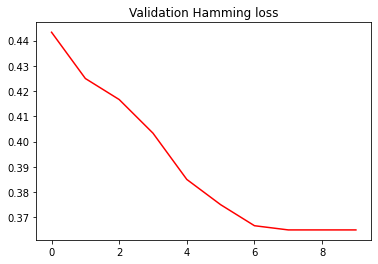

In [8]:
plt.plot(range(len(history.history["val_hamming_loss"])), history.history["val_hamming_loss"],
             color='red', label='Validation hamming loss')
plt.title('Validation Hamming loss')
plt.show()